# 1. This is my Title

In [4]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, http://localhost:8080/simple/


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

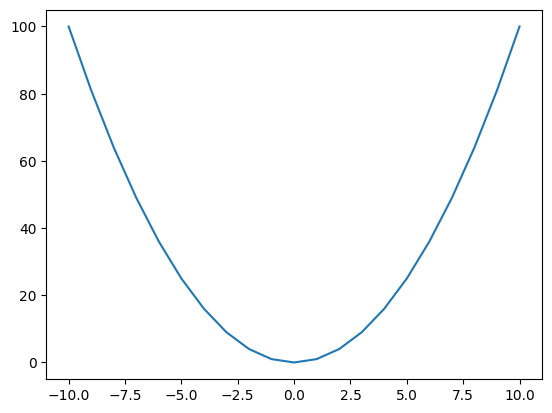

In [18]:
x = list(range(-10, 11))
y = np.array([v**2 for v in x])
plt.plot(x, y)
plt.show()

# 1. Load in Penguins Dataset

In [19]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# 2. Visualize my data

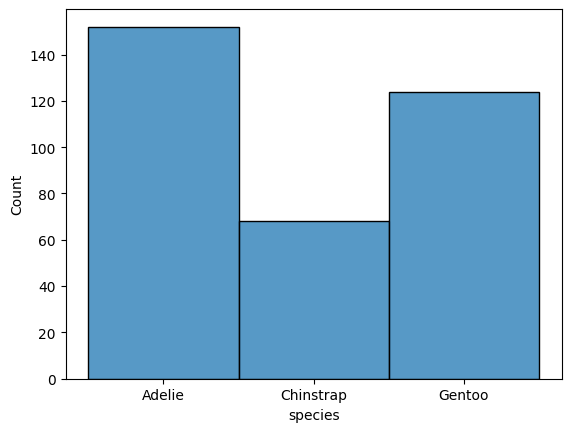

In [20]:
sns.histplot(penguins["species"])
plt.show()

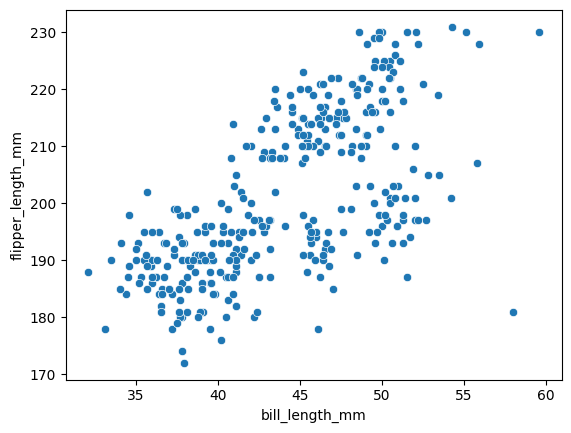

In [21]:
sns.scatterplot(x="bill_length_mm", y="flipper_length_mm", data=penguins)
plt.show()

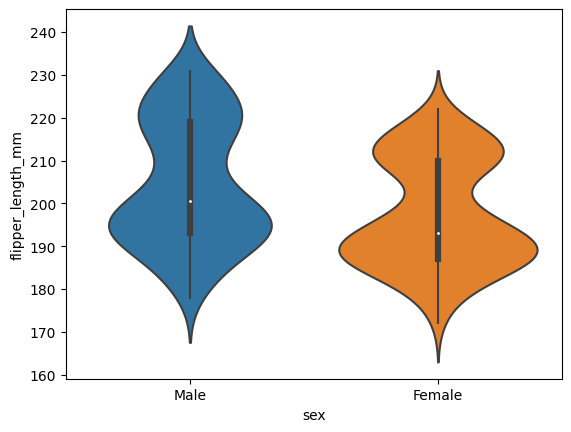

In [22]:
sns.violinplot(x='sex', y='flipper_length_mm', data=penguins)
plt.show()

In [23]:
# Drop rows with missing values
penguins = penguins.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
penguins['sex_encoded'] = label_encoder.fit_transform(penguins['sex'])

# Features and target variable
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
# X = penguins[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
y = penguins['sex_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_pred = model.predict(X_test)
sex = lambda n: "male" if n == 1 else "female"

def accuracy(y_pred, y_actual):
    return np.sum(y_pred == y_actual) / len(y_pred)

for i in range(10):
    print(f"Prediction: {sex(y_pred[i])}, Actual: {sex(y_test.iloc[i])}")

print(accuracy(y_pred, y_test))

Prediction: female, Actual: female
Prediction: female, Actual: female
Prediction: male, Actual: male
Prediction: female, Actual: female
Prediction: male, Actual: male
Prediction: female, Actual: female
Prediction: male, Actual: male
Prediction: male, Actual: male
Prediction: male, Actual: male
Prediction: male, Actual: male
0.9
